In [34]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from numpy import (sin, cos, pi)
import matplotlib.pyplot as plt
from scipy.fftpack import (fft, fftfreq)
from scipy.signal import stft
from scipy.signal import windows
from torch import nn, optim
from PIL import Image

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils

In [2]:
road_pitch = np.load('/home/student/Desktop/Stage ENSTA/road values/pitch_velocity_values road.npy')
#Import Data


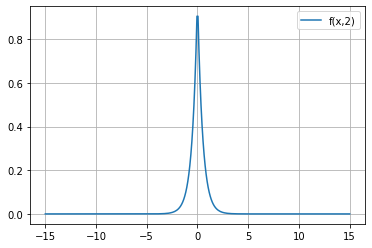

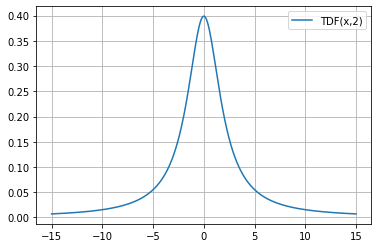

In [34]:
t = np.linspace(-15,15,300)

def f(x,a):
    return np.exp(-a*abs(x))

def TDF(t,a):
    return np.sqrt(2/np.pi)*((a)/(t**(2)+a**2))

#Plot function and its Fourier transform

plt.figure(1)
plt.plot(t, f(t, 2), label = f"f(x,2)")
plt.legend()
plt.grid()

plt.figure(2)
plt.plot(t, TDF(t,2), label = f"TDF(x,2)")
plt.legend()
plt.grid()

In [3]:
road_pitch_copy_2 = road_pitch
rp11 = road_pitch_copy_2[200:1000]

NameError: name 'road_pitch' is not defined

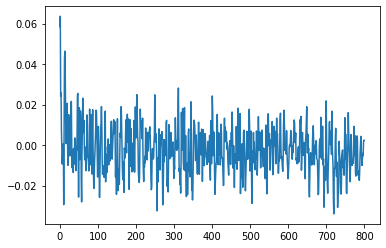

In [36]:
t = np.linspace(0,800,800)
plt.plot(t, rp11)

In [5]:
#@title Run section
Nfft=rp11.size

X=fft(rp11,axis=0)
X=X/Nfft
F=fftfreq(Nfft)

F_disp_id=np.where(F>=0)
plt.figure(figsize=(10,5))
plt.plot(np.absolute(X[F_disp_id]),color=[0.4,0,0.8])
plt.ylabel('Amplitude Spectrum',fontsize=14)
plt.xlabel('Frequency bin',fontsize=14)
plt.title('Total Spectrum',fontsize=14)
plt.grid()
plt.show()
#Plot STFT

plt.figure(figsize=(10,5))
f, t, Sxx = signal.spectrogram(rp11, 1e3)
plt.figure(figsize=(8,10))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
#Plot Spectogram


NameError: name 'rp11' is not defined

In [3]:
#Data Slicing

road_pitch_copy_2 = road_pitch
liste_sub_pitch = []
liste_vitesses = [0.2,0.2,0.2,0.2,0.4,0.4,0.4,0.4,0.6,0.6,0.6,0.6,0.8,0.8,0.8,0.8,1.0,1.0,1.0,1.0,1.0]
print(len(liste_vitesses))
def split_list(a_list):
    half = len(a_list)//2
    return a_list[:half], a_list[half:]

road_pitch_copy_2 = road_pitch
rp11 = road_pitch_copy_2[200:1000]
a, b = split_list(rp11)

liste_sub_pitch.append(a)
liste_sub_pitch.append(b)

rp12 = road_pitch_copy_2[1050:2000]
c,d = split_list(rp12)

liste_sub_pitch.append(c)
liste_sub_pitch.append(d)

rp21 = road_pitch_copy_2[2050:2500]
e,f = split_list(rp21)

liste_sub_pitch.append(e)
liste_sub_pitch.append(f)

rp22 = road_pitch_copy_2[2600:3050]
h,i = split_list(rp22)

liste_sub_pitch.append(h)
liste_sub_pitch.append(i)

rp31 = road_pitch_copy_2[3100:3550]
j,k = split_list(rp31)

liste_sub_pitch.append(j)
liste_sub_pitch.append(k)

rp32 = road_pitch_copy_2[3600:3950]
l,m = split_list(rp31)

liste_sub_pitch.append(l)
liste_sub_pitch.append(m)

rp41 = road_pitch_copy_2[4000:4300]
n,o = split_list(rp41)

liste_sub_pitch.append(n)
liste_sub_pitch.append(o)

rp42 = road_pitch_copy_2[4300:4600]
q,r = split_list(rp42)

liste_sub_pitch.append(q)
liste_sub_pitch.append(r)

rp51 = road_pitch_copy_2[4650:5000]
s,t = split_list(rp51)

liste_sub_pitch.append(s)
liste_sub_pitch.append(t)

rp52 = road_pitch_copy_2[5000:5300]
u,v = split_list(rp52)

liste_sub_pitch.append(u)
liste_sub_pitch.append(v)

21


<ipython-input-33-1bdda9f15f27>:9: RuntimeWarning: divide by zero encountered in log
  x = np.log(abs(2*np.pi*f*t))  # Test signal


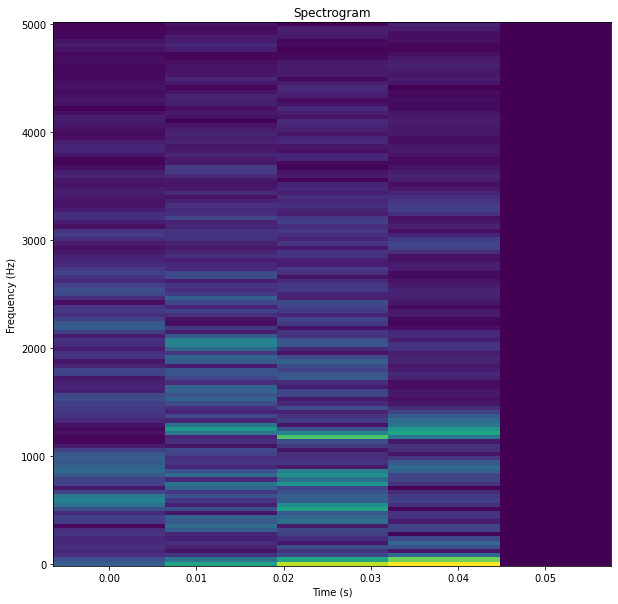

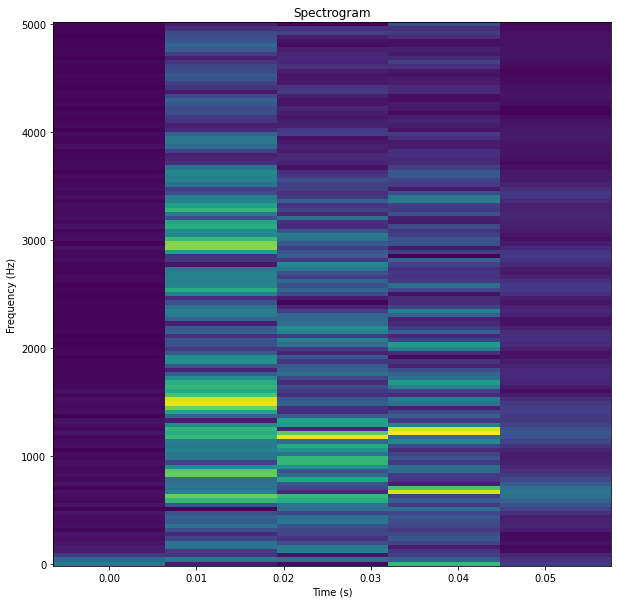

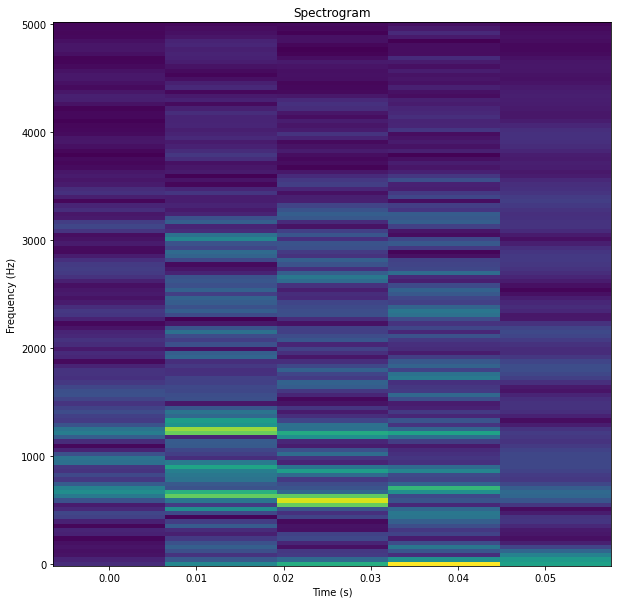

/home/student/miniconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 225, using nperseg = 225
  warnings.warn('nperseg = {0:d} is greater than input length '


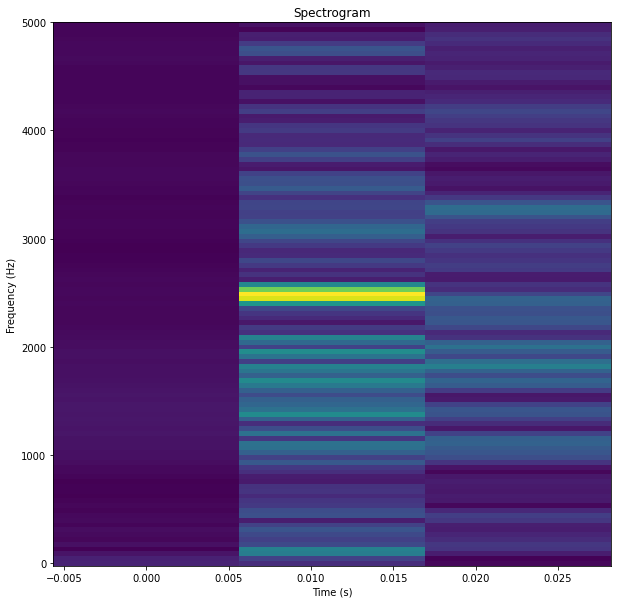

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# Generate a test signal
fs = 10000  # Sample rate (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector
f = 500  # Frequency of the test signal (Hz)
x = np.log(abs(2*np.pi*f*t))  # Test signal

for data in liste_sub_pitch[1:5]:
    
    frequencies, times, Zxx = stft(data, fs)
    plt.figure(figsize=(10,10))

    # Plot the spectrogram
    plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto')
    #plt.colorbar(label='Magnitude')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
    

In [25]:
def reshape_signal(liste_data):
        
    liste_len = list(sorted(liste_data, key = lambda x: len(x)))
    reshaped_list = []
        
    for data in liste_data:
        data = list(data)
        
        if len(data) < len(liste_len[-1]) :
                
            n = int(len(liste_len[-1]) - len(data))
            added_list = list(np.zeros(n))
            data += added_list
            reshaped_list.append(data)
                
    return reshaped_list

In [40]:
class Spect_to_png():
    
    def __init__(self, data, frequency, idx_spec,):
        
        self.data = data
        self.frequency = frequency
        self.idx_spec = idx_spec
        
    def __len__(self):
        return len(data)                                    
        
    def save_spectogram(self):
        
        fs = self.frequency  # Sample rate (Hz)
        t = np.arange(0, 1, 1/fs)  # Time vector
        f = 500  # Frequency of the test signal (Hz)

        # Save the spectrogram
        frequencies, times, Zxx = stft(self.data, fs) #calling STFT function
        
        # save the spectrogram
        plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto') #creating plot
        plt.axis("off") #Deletes the axis's labels to have only the png
        plt.savefig("/home/student/Desktop/Stage ENSTA/Internship-U2IS/src/traversal_cost/data_spectogram_reshaped/" + str(self.idx_spec) + ".png", bbox_inches='tight',                     
                    transparent = True, pad_inches=0) #saving data
        plt.close()
                
    def plot_spectogram(self):
        
        fs = self.frequency  # Sample rate (Hz)
        t = np.arange(0, 1, 1/fs)  # Time vector
        f = 500  # Frequency of the test signal (Hz) ?
        
        frequencies, times, Zxx = stft(self.data, fs)
        
        plt.figure(figsize=(10,10))
        plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto')
        plt.axis("off") #Deletes the axis's labels 
        plt.show()
        
    

In [41]:
frequency = 10000

new_list = reshape_signal(liste_sub_pitch)
    
for i, data in enumerate(new_list, 0):
    
    image = Spect_to_png(data, frequency, i)
    image.save_spectogram()
    #Saving Data


In [3]:
class SiameseNetworkSpect(nn.Module):
    def __init__(self):
        super(SiameseNetworkSpect, self).__init__()
        # Setting up the Sequential of CNN Layers
        
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=3,stride=1),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),
            
            nn.Conv2d(96, 256, kernel_size=3,stride=1,padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),
        )
        
        # Defining the fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(30976, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.5),
            
            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),
            
            nn.Linear(128,1))
        
    def forward_once(self, x):
        # Forward pass 
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1):
        # forward pass of input 1
        output1 = self.forward_once(input1)
        return output1


In [43]:
print(SiameseNetworkSpect.__init__)

<function SiameseNetworkSpect.__init__ at 0x7f0c7eba5ca0>


In [64]:
from torch.utils.data import Dataset
import pandas as pd
import os
import io 
from PIL import Image
import torch
import csv

In [102]:
class Spect_to_vector(Dataset):
    
    def __init__(self, csv_file, root_dir, transform=None):
        
        self.annotations = pd.read_csv(csv_file, sep=";")
        print(self.annotations)
        self.root_dir = root_dir
        #print(root_dir)
        self.transform = transform
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, index):
        
        #Converting png to torch tensor
        
        img_path = os.path.join(self.root_dir, str(self.annotations.iloc[index,0]) + ".png")
        image = Image.open(img_path)
        
        y_label = torch.tensor(float(self.annotations.iloc[index,-1]))
        
        if self.transform:
            
            image = self.transform(image)

        return (image, y_label)    

In [76]:
import csv 

csv_file_path = '/home/student/Desktop/Stage ENSTA/Internship-U2IS/src/traversal_cost/test_data.csv' 
data = [[10, 11, 12, 13, 14,15, 16,17,18,19, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 
        ['0.2','0.2','0.2','0.2','0.4','0.4','0.4','0.4','0.6','0.6','0.6','0.6','0.8','0.8','0.8','0.8','1.0','1.0','1.0','1.0']
        ]  
        
        #['0.2','0.2','0.2','0.2','0.4','0.4','0.4','0.4','0.6','0.6','0.6','0.6','0.8','0.8','0.8','0.8','1.0','1.0','1.0','1.0']
        #[0.2,0.2,0.2,0.2,0.4,0.4,0.4,0.4,0.6,0.6,0.6,0.6,0.8,0.8,0.8,0.8,1.0,1.0,1.0,1.0,]]  


with open(csv_file_path, 'w', newline = '') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerows(data)
    
print(file)
      

<_io.TextIOWrapper name='/home/student/Desktop/Stage ENSTA/Internship-U2IS/src/traversal_cost/test_data.csv' mode='w' encoding='UTF-8'>


In [77]:
list_transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize((356, 356)),
            transforms.Grayscale(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )

In [103]:
data = Spect_to_vector(csv_file='Labels_speed_2.csv', root_dir='data_spectogram', transform= list_transform)

    Name  speed
0     10    0.2
1     11    0.2
2     12    0.2
3     13    0.2
4     14    0.4
5     15    0.4
6     16    0.4
7     17    0.4
8     18    0.6
9     19    0.6
10   110    0.6
11   111    0.6
12   112    0.8
13   113    0.8
14   114    0.8
15   115    0.8
16   116    1.0
17   117    1.0
18   118    1.0
19   119    1.0


In [104]:
data[0]

TypeError: Input image tensor permitted channel values are [3], but found 4

In [ ]:
dataset = DataLoader(data, batch_size=3)

In [72]:
#for couple in dataset:
#    
#    print(couple)

batch = next(iter(dataset))

TypeError: join() argument must be str, bytes, or os.PathLike object, not 'float64'

In [70]:
list_transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Grayscale(),
        ]
    )


image = Image.open("/home/student/Desktop/Stage ENSTA/Internship-U2IS/src/traversal_cost/data_spectogram/10.png")
image = image.convert("RGB")
transform = transforms.ToTensor()

image2 = list_transform(image)
print(image2.shape)
image2.show()
#Virer le 4e caneacu d'opacité

torch.Size([1, 217, 334])


AttributeError: 'Tensor' object has no attribute 'show'

In [42]:
liste = open('/home/student/Desktop/Stage ENSTA/Internship-U2IS/src/traversal_cost/test_data.csv', 'w', newline='')
for data in liste:
     print(data)
    

UnsupportedOperation: not readable

In [107]:
A = [1,2,3]
B = list(np.zeros(5))
print(A+B)


[1, 2, 3, 0.0, 0.0, 0.0, 0.0, 0.0]
